Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 384)       885120    
                                   

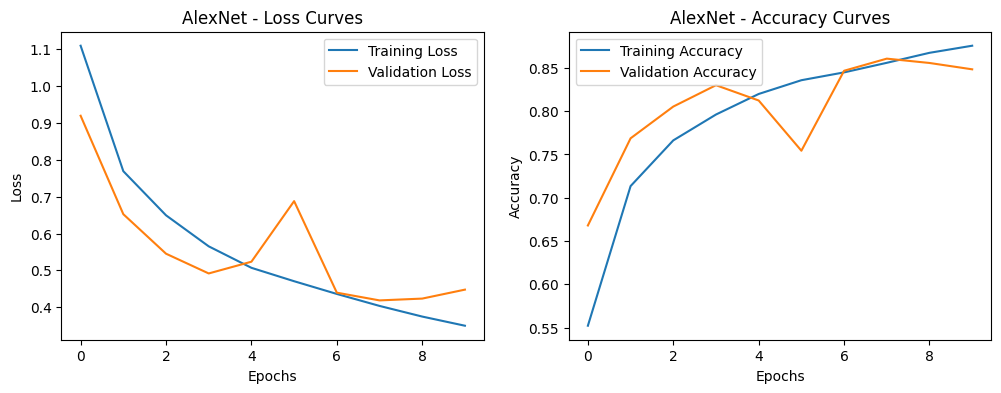

In [6]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint


# Define data paths
train_path = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_path = '/kaggle/input/intel-image-classification/seg_test/seg_test'
prediction_path = '/kaggle/input/intel-image-classification/seg_pred/seg_pred'

# Image dimensions
img_width, img_height = 227, 227
input_shape=(img_width, img_height,3)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Test data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

# Build AlexNet model
model = models.Sequential()

model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), input_shape=input_shape, activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(layers.Conv2D(256, (5, 5), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(layers.Conv2D(384, (3, 3), padding="same", activation='relu'))
model.add(layers.Conv2D(384, (3, 3), padding="same", activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding="same", activation='relu'))

model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(6, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  


model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
checkpoint = ModelCheckpoint('best_alexnet_model.h5', save_best_only=True)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint]
)

# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('AlexNet - Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('AlexNet - Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



94/94 [==============================] - 8s 83ms/step - loss: 0.4186 - accuracy: 0.8607
AlexNet - Test Loss: 0.4185621738433838 Test Accuracy: 0.8606666922569275
1/1 [==============================] - 0s 20ms/step


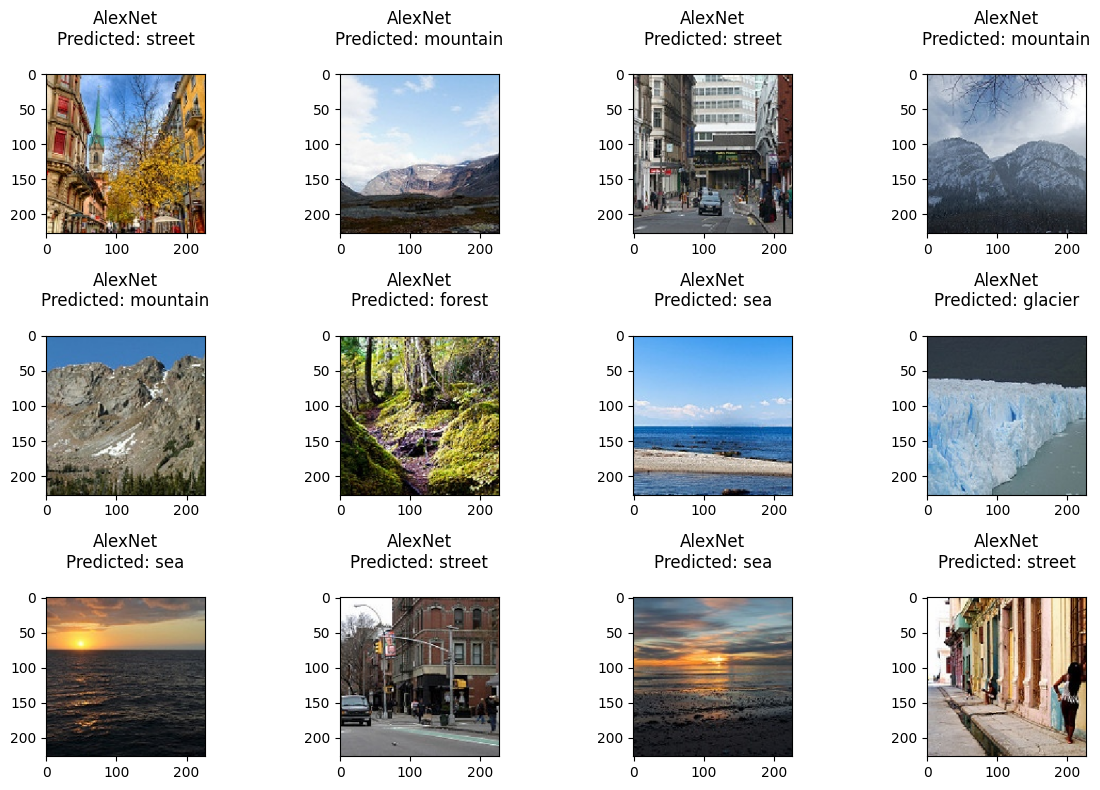

In [7]:
# Load the best weights for evaluation
#best_alexnet_model = model('best_alexnet_model.h5')
from tensorflow.keras.preprocessing import image
best_alexnet_model = load_model('best_alexnet_model.h5')

# Evaluate the model on the test set
eval_result = best_alexnet_model.evaluate(test_generator)
print("AlexNet - Test Loss:", eval_result[0], "Test Accuracy:", eval_result[1])


# Function to make predictions and display images
def display_predictions(model, model_name, image_paths, class_names):
    plt.figure(figsize=(12, 8))
    for i, image_path in enumerate(image_paths):
        plt.subplot(3, 4, i + 1)

        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(img_width, img_height))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Make predictions
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        predicted_class_name = class_names[predicted_class_index]

        # Display the image and predicted class
        plt.imshow(img)
        plt.title(f'{model_name}\nPredicted: {predicted_class_name}\n')

    plt.tight_layout()
    plt.show()

# Retrieve class names from the training generator
class_names = list(train_generator.class_indices.keys())

# Paths to 12 images from the prediction set
prediction_image_paths = [
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10004.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10005.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10012.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10013.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10017.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10021.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/1003.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10034.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10038.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10040.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10043.jpg',
    '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10045.jpg'
]

# Display predictions for AlexNet
display_predictions(best_alexnet_model, 'AlexNet', prediction_image_paths, class_names)
